# Проект: Прогнозирование и эмуляция показаний датчиков космического аппарата

Описание:


In [32]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_absolute_error, mean_squared_error
from sklearn.preprocessing import MinMaxScaler
import tensorflow as tf

from keras.models import Sequential
from keras.layers import Dense, Input

import warnings
import random
import os

warnings.filterwarnings('ignore')

In [33]:
SEED = 42

## Эмуляция

Данная часть проекта выполнялась основываясь на материалы изложенные в статье: "Application of data correlation analysis in the problem of emulation of spacecraft sensors" 
* https://iopscience.iop.org/article/10.1088/1742-6596/2388/1/012070

In [34]:
df = pd.read_csv('data.csv', sep=';')

In [35]:
# Конвертация значений колонок в тип данных float с заменой "," на точки "."
for col in df.columns: 
    df[col] = df[col].apply( lambda x: float(str(x).replace(',','.')))
    


In [36]:
df.head(20)

,"Bort,V","Bort,A","Sun,V","Sun,A","IPrd1,A","IPrd2,A","NAP,A","EO,A","DTE,A","TMR,A",...,"СomVP,D","ScСom,D","Comm,O",TimeSec,Year,Month,Day,Hour,Minute,Second
0,17.13,0.26,0.10,0.0,0.0,0.08,0.0,0.0,0.0,0.03,...,356.0,84.0,2103.0,1.214574e+09,2008.0,6.0,27.0,13.0,43.0,43.0
1,16.70,0.26,0.10,0.0,0.0,0.08,0.0,0.0,0.0,0.03,...,356.0,84.0,2103.0,1.214574e+09,2008.0,6.0,27.0,13.0,48.0,3.0
2,16.30,0.26,0.10,0.0,0.0,0.08,0.0,0.0,0.0,0.03,...,356.0,84.0,2103.0,1.214575e+09,2008.0,6.0,27.0,13.0,52.0,3.0
3,15.93,0.26,0.10,0.0,0.0,0.08,0.0,0.0,0.0,0.03,...,356.0,84.0,2103.0,1.214575e+09,2008.0,6.0,27.0,13.0,55.0,43.0
4,15.60,0.26,0.10,0.0,0.0,0.08,0.0,0.0,0.0,0.03,...,356.0,84.0,2103.0,1.214575e+09,2008.0,6.0,27.0,13.0,59.0,3.0
5,15.30,0.26,0.10,0.0,0.0,0.08,0.0,0.0,0.0,0.03,...,356.0,84.0,2103.0,1.214575e+09,2008.0,6.0,27.0,14.0,2.0,3.0
6,15.03,0.26,0.10,0.0,0.0,0.08,0.0,0.0,0.0,0.03,...,356.0,84.0,2103.0,1.214575e+09,2008.0,6.0,27.0,14.0,4.0,43.0
7,14.80,0.26,0.10,0.0,0.0,0.08,0.0,0.0,0.0,0.03,...,356.0,84.0,2103.0,1.214576e+09,2008.0,6.0,27.0,14.0,7.0,3.0
8,14.60,0.26,0.10,0.0,0.0,0.08,0.0,0.0,0.0,0.03,...,356.0,84.0,2103.0,1.214576e+09,2008.0,6.0,27.0,14.0,9.0,3.0
9,14.43,0.26,0.10,0.0,0.0,0.08,0.0,0.0,0.0,0.03,...,356.0,84.0,2103.0,1.214576e+09,2008.0,6.0,27.0,14.0,10.0,43.0


In [37]:
# Построим визуализацию, отражающую корреляцию параметров
df.corr().style.background_gradient()

,"Bort,V","Bort,A","Sun,V","Sun,A","IPrd1,A","IPrd2,A","NAP,A","EO,A","DTE,A","TMR,A","Rez,A","N344k1,A","344k1,A","N344k2,A","344k2,A","338km,A","BEM,A","KT,A","Sp1,A","Sp2,A","Sp3,A","Sp4,A","SPrm1,V","SPrm2,V","FPrd1,V","RPrd1,V","FPrd2,V","RPrd2,V","Ux,V","Uy,V","Uz,V","Tbck,C","TPrd1,C","TPrd2,C","Tnap,C","Tab,C","Plat1,C","Plat2,C","Plat3,C","Plat4,C","DT1,C","DT2,C","DT3,C","T1,C","T2,C","T8,C","T7,C","UkOr,O","k338km,O","k344k2,O","k344k1,O","UkNAP,O","СomVP,D","ScСom,D","Comm,O",TimeSec,Year,Month,Day,Hour,Minute,Second
"Bort,V",1.000000,0.034185,0.380451,0.343240,nan,0.066740,nan,nan,nan,nan,nan,nan,nan,nan,nan,-0.134663,0.144480,nan,0.397892,0.375394,0.155737,0.329423,0.042114,0.363150,nan,nan,nan,nan,0.021640,0.203571,0.008830,-0.164189,-0.206047,0.005878,-0.134194,nan,0.415670,-0.074243,0.541291,0.054407,-0.210044,-0.089428,-0.147480,-0.260337,0.002551,-0.268176,0.018730,0.189886,0.127343,nan,nan,-0.078284,0.140097,0.104579,-0.038065,0.153305,nan,nan,nan,0.157684,-0.056788,-0.020227
"Bort,A",0.034185,1.000000,0.227281,0.303382,nan,0.966961,nan,nan,nan,nan,nan,nan,nan,nan,nan,0.020187,0.025522,nan,0.238955,0.229026,0.015608,0.354519,0.594617,0.393549,nan,nan,nan,nan,0.361376,0.325393,-0.244380,-0.152750,-0.320215,0.583968,-0.482551,nan,0.046712,0.261695,0.095701,-0.049858,-0.282321,0.402954,-0.246804,-0.116301,0.000103,-0.056269,0.082578,0.045056,-0.025535,nan,nan,-0.095326,0.035447,-0.096940,0.067170,-0.072623,nan,nan,nan,-0.118647,0.257266,-0.036881
"Sun,V",0.380451,0.227281,1.000000,0.730126,nan,0.245450,nan,nan,nan,nan,nan,nan,nan,nan,nan,-0.007155,-0.132846,nan,0.704089,0.733551,0.297934,0.555272,0.152815,0.104778,nan,nan,nan,nan,0.135193,0.101429,-0.003601,-0.024166,-0.108274,0.130373,-0.120104,nan,0.001765,0.105593,0.032466,0.108381,-0.056301,0.132004,-0.048078,-0.051675,0.015507,-0.028829,-0.054413,0.017452,-0.044045,nan,nan,-0.203914,-0.000224,-0.060722,0.040602,-0.053829,nan,nan,nan,-0.057583,0.031716,-0.006496
"Sun,A",0.343240,0.303382,0.730126,1.000000,nan,0.328447,nan,nan,nan,nan,nan,nan,nan,nan,nan,-0.022245,-0.077477,nan,0.728090,0.745043,0.239944,0.516039,0.211906,0.113622,nan,nan,nan,nan,0.152041,0.114674,-0.042258,-0.034352,-0.134990,0.206591,-0.128155,nan,-0.033095,0.117016,0.025063,0.057501,-0.082832,0.199266,-0.083941,-0.071019,0.011440,-0.011429,-0.025289,-0.028508,-0.028261,nan,nan,-0.158445,-0.018085,-0.076379,0.040879,-0.077539,nan,nan,nan,-0.097939,0.123844,0.004926
"IPrd1,A",nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan
"IPrd2,A",0.066740,0.966961,0.245450,0.328447,nan,1.000000,nan,nan,nan,nan,nan,nan,nan,nan,nan,-0.111213,0.024871,nan,0.268178,0.248563,0.023709,0.345259,0.578468,0.393431,nan,nan,nan,nan,0.389532,0.309518,-0.233806,-0.139194,-0.334718,0.611230,-0.524641,nan,0.051263,0.286555,0.094437,-0.024211,-0.304917,0.380942,-0.257841,-0.108739,-0.003832,-0.014752,0.072906,0.010943,0.088401,nan,nan,-0.095672,0.000868,-0.133517,-0.034069,-0.115389,nan,nan,nan,-0.152025,0.217816,-0.042353
"NAP,A",nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan
"EO,A",nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan
"DTE,A",nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan
"TMR,A",nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,

In [38]:
df.corr()[df.corr() >= 0.7]

,"Bort,V","Bort,A","Sun,V","Sun,A","IPrd1,A","IPrd2,A","NAP,A","EO,A","DTE,A","TMR,A",...,"СomVP,D","ScСom,D","Comm,O",TimeSec,Year,Month,Day,Hour,Minute,Second
"Bort,V",1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
"Bort,A",NaN,1.0,NaN,NaN,NaN,0.966961,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
"Sun,V",NaN,NaN,1.000000,0.730126,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
"Sun,A",NaN,NaN,0.730126,1.000000,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
"IPrd1,A",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
Month,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Day,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Hour,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,0.777884,0.928926,NaN,0.981715,NaN,NaN,NaN,1.0,NaN,NaN
Minute,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,NaN


In [39]:
# Рассмотрим участок таблицы:
df.loc[:,'Ux,V':'TPrd1,C'].corr().style.background_gradient()

,"Ux,V","Uy,V","Uz,V","Tbck,C","TPrd1,C"
"Ux,V",1.000000,-0.139968,0.327479,0.545725,0.322522
"Uy,V",-0.139968,1.000000,-0.552236,-0.781020,-0.665807
"Uz,V",0.327479,-0.552236,1.000000,0.745230,0.734608
"Tbck,C",0.545725,-0.781020,0.745230,1.000000,0.800631
"TPrd1,C",0.322522,-0.665807,0.734608,0.800631,1.000000


Заметим хорощие показатели корреляции между параметрами Tbck, TPrd1 и Uz.

Попробуем эмулировать значения Uz по показателям Tbck, TPrd1.

Тогда Tbck, TPrd1 будут являться характеристиками (features), а Uz - искомым значением.

In [40]:
features = df.loc[:,'Tbck,C':'TPrd1,C']
target = df['Uz,V']


# Разделим датасет на test и train с разделением 25 процентов
features_train, features_test, target_train, target_test = train_test_split(features, target, test_size=0.25, random_state=SEED)

In [41]:
# Создадим и обучим модель линейной регрессии

linear_model = LinearRegression()
linear_model.fit(features_train, target_train)

LinearRegression()

In [42]:
# Предсказанные значения:
predicted = linear_model.predict(features_test)

In [43]:
# Вычислим среднюю абсолютную ошибку:
mean_absolute_error(target_test, predicted)

0.08558001709787286

Полученная метрика MAE составила 0.0856.

## Прогнозирование

Установим random_seed

In [44]:
def reset_random_seeds(seed):
    os.environ['PYTHONHASHSEED']=str(seed)
    tf.random.set_seed(seed)
    np.random.seed(seed)
    random.seed(seed)

In [45]:
reset_random_seeds(SEED)

Временные признаки:

In [46]:
time_features = ['TimeSec', 'Year', 'Month','Day', 'Hour', 'Minute', 'Second']

Признаки из показаний коррелирующих датчиков:

In [47]:
sensors = ['Ux,V','Uy,V','Tbck,C','TPrd1,C']

Целевой признак:


In [48]:
target_sensor = ['Uz,V']

Количество шагов прогнозирования

In [49]:
n_outputs = [2, 3, 5]

Оцениваемая метрика при прогнозировании - RMSE

In [50]:
rmse =[]

Функция подготовки данных.

In [51]:
def make_data(data, features, target, max_lag, max_step, add_features=None, flag = 0):
    
    if add_features != None:
        df = data[features+target+add_features].copy()
    else:
        df = data[features+target].copy()
    f_columns = []
    t_columns = target.copy()
    
    for col in features:
        for lag in range(1, max_lag + 1):
            df['{}_t-{}'.format(col,lag)] = df[col].shift(lag)
            f_columns.append('{}_t-{}'.format(col,lag))
            
    for step in range(1, max_step + 1):
        t_columns.append('{}_t+{}'.format(target[0], step))
        df['{}_t+{}'.format(target[0], step)] = df[target].shift(-step)
    
    df = df.drop(features, axis=1).dropna().reset_index(drop=True)
    
    if flag == 0:
        return df
    else:
        return (df[f_columns+add_features] , df[t_columns]) if add_features != None else (df[f_columns] , df[t_columns])

In [52]:
step = 1
lag = 2

In [53]:
data_preprocessed = make_data(df, features=sensors, target=target_sensor,
                                  add_features=time_features, max_lag=lag, max_step=step, flag=0)
data_preprocessed.head(3)

,"Uz,V",TimeSec,Year,Month,Day,Hour,Minute,Second,"Ux,V_t-1","Ux,V_t-2","Uy,V_t-1","Uy,V_t-2","Tbck,C_t-1","Tbck,C_t-2","TPrd1,C_t-1","TPrd1,C_t-2","Uz,V_t+1"
0,2.33,1.214575e+09,2008.0,6.0,27.0,13.0,52.0,3.0,1.730,1.643,2.090,2.003,-17.0,-17.0,1.0,1.0,2.33
1,2.33,1.214575e+09,2008.0,6.0,27.0,13.0,55.0,43.0,1.810,1.730,2.170,2.090,-17.0,-17.0,1.0,1.0,2.33
2,2.33,1.214575e+09,2008.0,6.0,27.0,13.0,59.0,3.0,1.883,1.810,2.243,2.170,-17.0,-17.0,1.0,1.0,2.33


In [54]:
features_preprocessed = make_data(df, features=sensors, target=target_sensor,
                                  add_features=time_features, max_lag=lag, max_step=step, flag=1)[0]

target_preprocessed = make_data(df, features=sensors, target=target_sensor,
                                  add_features=time_features, max_lag=lag, max_step=step, flag=1)[1]

In [55]:
features_preprocessed.head(3)

,"Ux,V_t-1","Ux,V_t-2","Uy,V_t-1","Uy,V_t-2","Tbck,C_t-1","Tbck,C_t-2","TPrd1,C_t-1","TPrd1,C_t-2",TimeSec,Year,Month,Day,Hour,Minute,Second
0,1.730,1.643,2.090,2.003,-17.0,-17.0,1.0,1.0,1.214575e+09,2008.0,6.0,27.0,13.0,52.0,3.0
1,1.810,1.730,2.170,2.090,-17.0,-17.0,1.0,1.0,1.214575e+09,2008.0,6.0,27.0,13.0,55.0,43.0
2,1.883,1.810,2.243,2.170,-17.0,-17.0,1.0,1.0,1.214575e+09,2008.0,6.0,27.0,13.0,59.0,3.0


<Axes: >

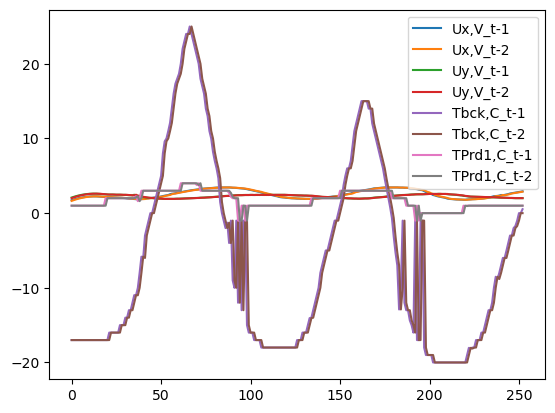

In [56]:
features_preprocessed.drop(time_features, axis=1).plot()

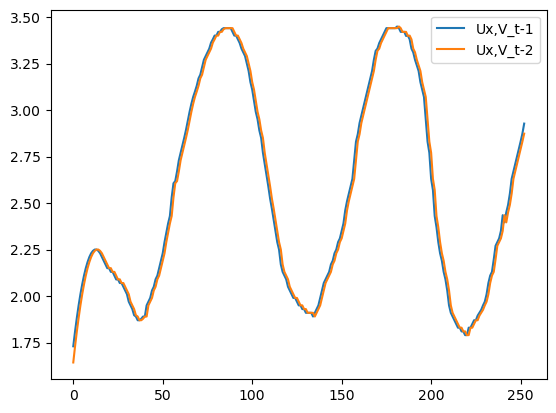

In [65]:
features_preprocessed[['Ux,V_t-1', 'Ux,V_t-2']].plot()
plt.show()

In [57]:
features_train, features_test = train_test_split(features_preprocessed, test_size=0.2, random_state=SEED, shuffle=False)
target_train, target_test = train_test_split(target_preprocessed, test_size=0.2, random_state=SEED, shuffle=False)

In [58]:
scaler = MinMaxScaler()
features_train = scaler.fit_transform(features_train)
features_test = scaler.transform(features_test)

### Прогнозирование с помощью сети прямого распространения

Для попытки прогнозирования показания датчика телеметрии на несколько временных интервалов использовалась нейронная сеть прямого распространения. Входной слой данной сети, как и в используемой для одноэтапного прогнозирования сети, содержит число нейронов, равное размеру скользящего окна.  Количество выходов нейронной сети было равным числу предсказываемых временных интервалов.

In [59]:
def create_model(n_features,output_layer):
    
    model = Sequential()
    model.add(Input(shape=(n_features, ))) 
    model.add(Dense(15, activation='relu')) 
    model.add(Dense(9, activation='relu'))
    model.add(Dense(6, activation='relu')) 
    model.add(Dense(output_layer))
    model.compile(optimizer='adam', loss='mse', metrics='mse')
    return model

In [60]:
def model_research(n_outputs, steps, lags, data, features, target, add_features=None, seed=SEED):
    metrics = {}
    
    for i, value in enumerate(n_outputs):
        
        #Подготовим признаки и целевой признак
        features_preprocessed = make_data(data, features = features, target = target,
                                  add_features = add_features, max_lag = lags[i], max_step = steps[i], flag = 1)[0]
        target_preprocessed = make_data(data, features = features, target = target,
                                  add_features = add_features, max_lag = lags[i], max_step = steps[i], flag = 1)[1]
        
        #Отделим тестовую и тренировочную выборки
        features_train, features_test = train_test_split(features_preprocessed, test_size=0.2, random_state=seed, shuffle=False)
        target_train, target_test = train_test_split(target_preprocessed, test_size=0.2, random_state=seed, shuffle=False)
        
        #Отмасштабируем признаки
        scaler = MinMaxScaler()
        features_train = scaler.fit_transform(features_train)
        features_test = scaler.transform(features_test)
        
        #Создадим и обучим модель
        n_features = features_train.shape[1]
        model = create_model(n_features, output_layer=value)
        model.fit(features_train, target_train, epochs=100, verbose=0, validation_data=(features_test, target_test))
        
        #Получим метрику
        predictions = model.predict(features_test,verbose=0)
        metrics[value] = mean_squared_error(target_test, predictions) ** 0.5
        
        del features_preprocessed
        del target_preprocessed
        del model
    return metrics
    #plt.plot(n_outputs, metrics)
    #plt.show()

Зададим параметры для исследования:
- steps - количество шагов прогнозирования наперед
- lags - лаг для признаков 
- n_outputs - выходной слой нейронной сети (кол-во шагов + 1, для учета показания на текущем шаге)

In [61]:
steps = [1,2,3,4]
lags = [2,3,4,5]
n_outputs = [2,3,4,5]

{2: 0.38144553679436, 3: 0.43220850746944384, 4: 0.4357148616479616, 5: 0.4503157475741884}


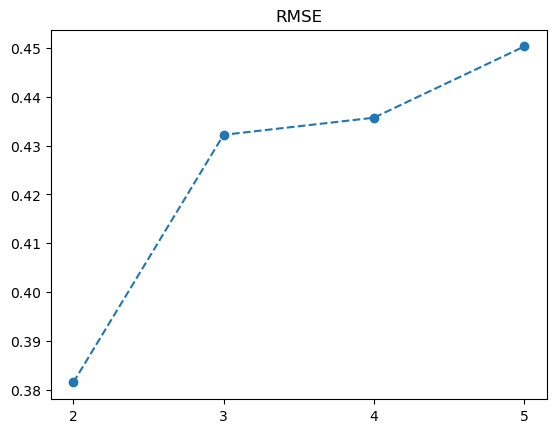

CPU times: total: 17.7 s
Wall time: 14.1 s


In [63]:
%%time 
result = model_research(n_outputs, steps, lags, df, sensors, target_sensor, add_features=None)
print(result)
plt.plot(result.keys(), result.values(), linestyle='dashed', marker='o',)
plt.title('RMSE')
plt.xticks(ticks=list(result.keys()))
plt.show()

RMSE увеличивается с увеличением количества шагов прогнозирования 